# Laboratory practice № 8 (Modal controllers and observers)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter
import scipy

In [2]:
dt = 0.001

In [3]:
t = sympy.symbols("t",real=True)

## Task 1

In [4]:
A = np.array([
    [-1, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 3, 4],
    [0, 0, -4, 3]
])

B = np.array([
    [0],
    [5],
    [0],
    [6]
])

sigma_1 = [-1]*4
sigma_2 = [-1, -10, -100, -100]
sigma_3 = [-1, -10, 4j, -4j]
sigma_4 = [-1, -10, -3 + 4j, -3 -4j]


In [5]:
U = np.concatenate([B, A@B, A@A@B, A@A@A@B],axis=1)
U

array([[   0,    0,    0,    0],
       [   5,   10,   20,   40],
       [   0,   24,  144,  264],
       [   6,   18,  -42, -702]])

In [6]:
np.linalg.matrix_rank(U)

3

In [7]:
scipy.linalg.eigvals(A)

array([ 3.+4.j,  3.-4.j, -1.+0.j,  2.+0.j])

In [8]:
J_P, J = sympy.Matrix(A).jordan_form()

In [9]:
J

Matrix([
[-1, 0,       0,       0],
[ 0, 2,       0,       0],
[ 0, 0, 3 - 4*I,       0],
[ 0, 0,       0, 3 + 4*I]])

In [10]:
J_P.inv()@B

Matrix([
[0],
[5],
[3],
[3]])

-1 is not controllable, but stable

In [11]:
sigma_1

[-1, -1, -1, -1]

In [12]:
G_1 = np.array([
    [-1, 1, 0, 0],
    [0, -1, 1, 0],
    [0, 0, -1, 1],
    [0, 0, 0, -1]
])
Y_1 = np.array([0,1,1,1]).reshape((1,-1))

In [13]:
B@Y_1

array([[0, 0, 0, 0],
       [0, 5, 5, 5],
       [0, 0, 0, 0],
       [0, 6, 6, 6]])

In [14]:
P_1 = scipy.linalg.solve_sylvester(A,-G_1,B@Y_1)
P_1

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.66666667,  2.22222222,  2.40740741],
       [ 0.        , -0.75      , -0.9375    , -0.9609375 ],
       [ 0.        ,  0.75      ,  0.75      ,  0.7265625 ]])

In [15]:
K_1 = -Y_1 @ np.linalg.pinv(P_1)
K_1

array([[ 0.        , -0.31764706, -0.94117647, -1.56862745]])

In [16]:
scipy.linalg.eigvals(A + B@K_1)

array([-1.00007639+0.00000000e+00j, -0.99996181+6.61508003e-05j,
       -0.99996181-6.61508003e-05j, -1.        +0.00000000e+00j])

In [17]:
sys_1 = ctrl.ss(A + B@K_1,np.zeros((4,1)),np.zeros((1,4)),0)
sys_1

<LinearIOSystem:sys[2]:['u[0]']->['y[0]']>

In [18]:
time_1 = np.linspace(0,10,int(10/dt))

In [19]:
y_1 = ctrl.initial_response(sys_1,time_1,X0=np.ones((4,1)))

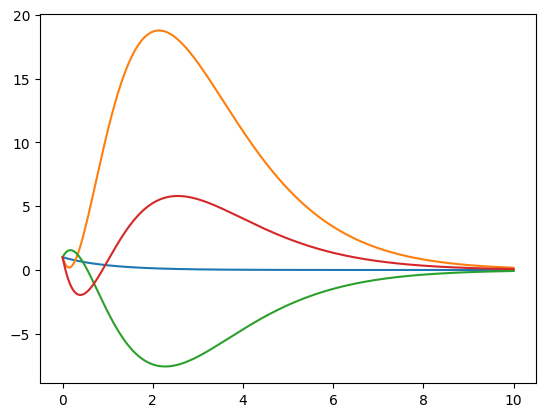

In [20]:
plt.plot(time_1,y_1.states[0,:])
plt.plot(time_1,y_1.states[1,:])
plt.plot(time_1,y_1.states[2,:])
plt.plot(time_1,y_1.states[3,:])

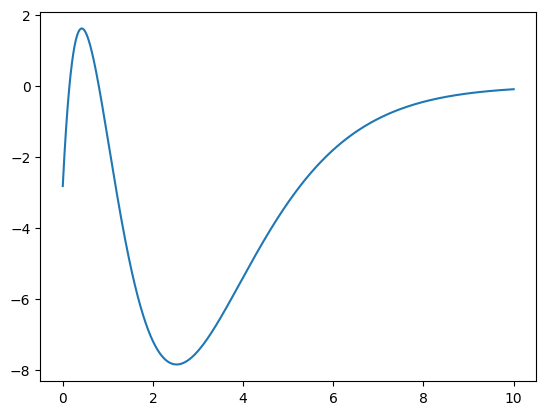

In [21]:
plt.plot(time_1,(K_1@y_1.states).reshape(-1))

In [22]:
sigma_2

[-1, -10, -100, -100]

In [23]:
G_2 = np.array([
    [-1, 0, 0, 0],
    [0, -10, 0, 0],
    [0, 0, -100, 1],
    [0, 0, 0, -100]
])
Y_2 = np.array([0,1,1,1]).reshape((1,-1))
P_2 = scipy.linalg.solve_sylvester(A,-G_2,B@Y_2)
K_2 = -Y_2 @ np.linalg.pinv(P_2)
K_2

array([[    0.        , -1468.8       ,  -849.875     ,  1187.66666667]])

In [24]:
scipy.linalg.eigvals(A + B@K_2)

array([-100.+7.75575222e-05j, -100.-7.75575222e-05j,
        -10.+0.00000000e+00j,   -1.+0.00000000e+00j])

In [25]:
sys_2 = ctrl.ss(A + B@K_2,np.zeros((4,1)),np.zeros((1,4)),0)
time_2 = np.linspace(0,1,int(1/dt))
y_2 = ctrl.initial_response(sys_2,time_2,X0=np.ones((4,1)))

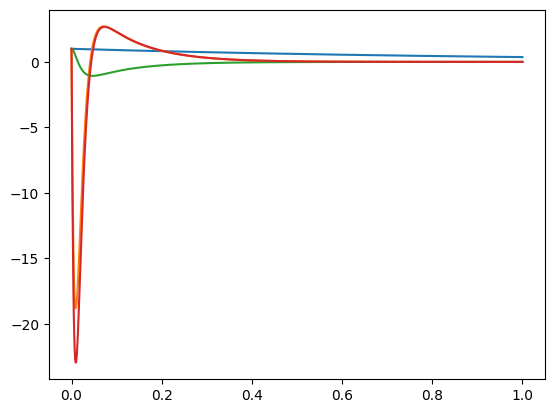

In [26]:
plt.plot(time_2,y_2.states[0,:])
plt.plot(time_2,y_2.states[1,:])
plt.plot(time_2,y_2.states[2,:])
plt.plot(time_2,y_2.states[3,:])

To be continued...

## Task 2

In [27]:
A = np.array([
    [0, 3, 0 ,0],
    [-3, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -1, 0]
])
C = np.array([2, 0, 0, 3]).reshape((1,-1))

In [28]:
V = np.concatenate([
    C, C@A, C@A@A, C@A@A@A
])
V

array([[  2,   0,   0,   3],
       [  0,   6,  -3,   0],
       [-18,   0,   0,  -3],
       [  0, -54,   3,   0]])

In [29]:
np.linalg.matrix_rank(V)

4

In [30]:
J_P, J = sympy.Matrix(A).jordan_form()
J

Matrix([
[-3*I,  0, 0,   0],
[   0, -I, 0,   0],
[   0,  0, I,   0],
[   0,  0, 0, 3*I]])

In [31]:
C@J_P

Matrix([[2*I, 3, 3, -2*I]])

In [32]:
Y_5 = np.ones((4,1))
Q_1 = scipy.linalg.solve_sylvester(G_1,-A,Y_5@C)
L_1 = np.linalg.inv(Q_1)@Y_5

In [33]:
L_1

array([[-2.        ],
       [ 0.58333333],
       [-0.16666667],
       [ 0.        ]])

In [34]:
sys_5 = ctrl.ss(A, [[0]]*4,C,0)
sys_5_obs = ctrl.ss(A + L_1@C,-L_1,C,0)

In [35]:
time_5 = np.linspace(0,20,int(20/dt))
y_5 = ctrl.initial_response(sys_5,time_5,X0=np.ones((4,1)))
y_5_obs = ctrl.forced_response(sys_5_obs,time_5,X0=np.array([[2],[0],[0],[-1]]),U=y_5.outputs)

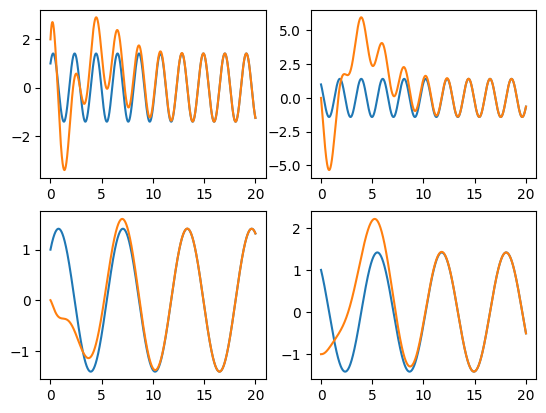

In [36]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(time_5,y_5.states[0,:])
ax[0,0].plot(time_5,y_5_obs.states[0,:])
ax[0,1].plot(time_5,y_5.states[1,:])
ax[0,1].plot(time_5,y_5_obs.states[1,:])
ax[1,0].plot(time_5,y_5.states[2,:])
ax[1,0].plot(time_5,y_5_obs.states[2,:])
ax[1,1].plot(time_5,y_5.states[3,:])
ax[1,1].plot(time_5,y_5_obs.states[3,:])

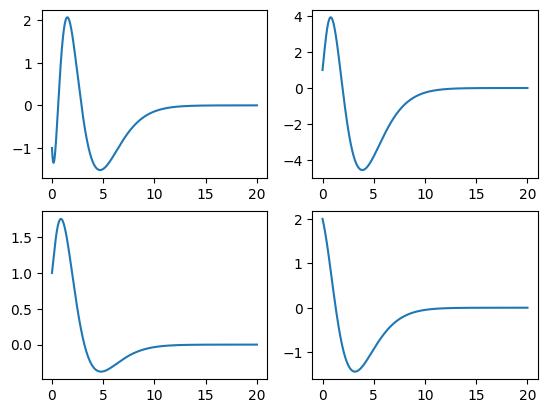

In [37]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(time_5,y_5.states[0,:]-y_5_obs.states[0,:])
ax[0,1].plot(time_5,y_5.states[1,:]-y_5_obs.states[1,:])
ax[1,0].plot(time_5,y_5.states[2,:]-y_5_obs.states[2,:])
ax[1,1].plot(time_5,y_5.states[3,:]-y_5_obs.states[3,:])


To be continued...

## Task 3

In [39]:
A = np.array([
    [3, -11, -7, 5],
    [-11, 3, -5, 7],
    [-7, -5, 3, 11],
    [5, 7, 11, 3]
])
B = np.array([
    [2],
    [4],
    [2],
    [4]
])
C = np.array([
    [2, -2, 2, 2],
    [2, 4, -2, 4]
])

In [40]:
J_P, J = sympy.Matrix(A).jordan_form()

In [41]:
J

Matrix([
[-20, 0,  0,  0],
[  0, 4,  0,  0],
[  0, 0, 12,  0],
[  0, 0,  0, 16]])

In [43]:
J_P.inv()@B

Matrix([
[-1],
[ 2],
[ 1],
[ 2]])

In [44]:
C@J_P

Matrix([
[0,  0, 8, 0],
[0, 12, 0, 4]])

In [80]:
G = np.array([
    [-10, 0 ,0 ,0],
    [0, -11, 0, 0],
    [0, 0, -12, 0],
    [0, 0, 0, -13]
])
Y_cont = np.array([1,1,1,1]).reshape((1,-1))
Y_obs = np.array([
    [0, 0],
    [1, 1],
    [1, 1],
    [1, 1]
])
P = scipy.linalg.solve_sylvester(A,-G,B@Y_cont)
K = -Y_cont @ np.linalg.inv(P)
Q = scipy.linalg.solve_sylvester(G,-A,Y_obs@C)
L = np.linalg.pinv(Q)@Y_obs

In [81]:
scipy.linalg.eigvals(A + B@K)

array([-13.00000004+0.j, -11.99999987+0.j, -11.00000014+0.j,
        -9.99999995+0.j])

In [82]:
scipy.linalg.eigvals(A + L@C)

array([-10.99999999+0.j, -12.00000003+0.j, -12.99999998+0.j,
       -20.        +0.j])

In [83]:
A_new = np.block([
    [A + B@K, -B@K],
    [np.zeros_like(A), A + L@C]
])

In [84]:
sys = ctrl.ss(A_new,np.zeros((8,1)),np.zeros((1,8)),0)

In [89]:
time_ = np.linspace(0,3,int(3/dt))

In [99]:
y = ctrl.initial_response(sys,T=time_,X0=[-1,-1,-1,-1,2,2,2,2])

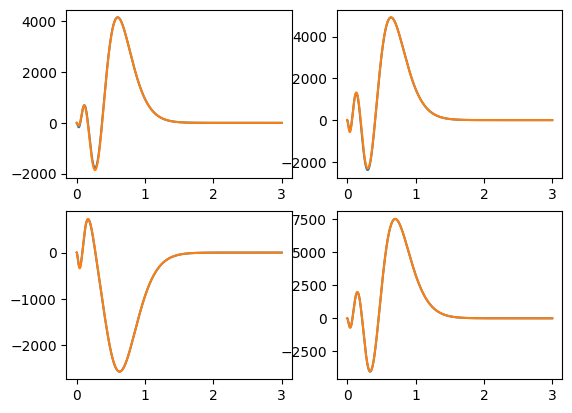

In [100]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(time_,y.states[0,:])
ax[0,0].plot(time_,y.states[0,:]+y.states[4,:])
ax[0,1].plot(time_,y.states[1,:])
ax[0,1].plot(time_,y.states[1,:]+y.states[5,:])
ax[1,0].plot(time_,y.states[2,:])
ax[1,0].plot(time_,y.states[2,:]+y.states[6,:])
ax[1,1].plot(time_,y.states[3,:])
ax[1,1].plot(time_,y.states[3,:]+y.states[7,:])

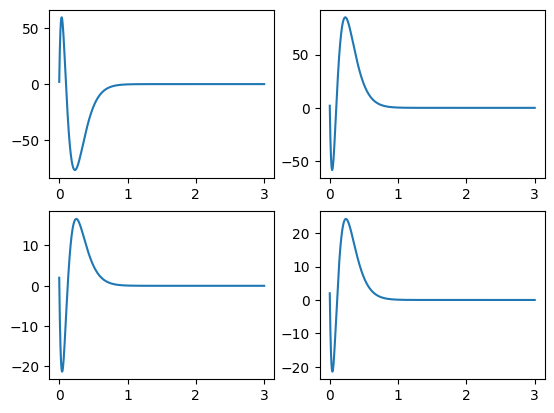

In [101]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(time_,y.states[4,:])
ax[0,1].plot(time_,y.states[5,:])
ax[1,0].plot(time_,y.states[6,:])
ax[1,1].plot(time_,y.states[7,:])